# Network Notes

In [795]:
# good 160 unit *3 network
network_model = "func-27-1-20"
iter1 = 213750
iter2 = 23550
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_fn_postfix2 = "output_" + str(0) + "_" + str(iter2)
output_fn_postfix2_mid = "output_" + str(1) + "_" + str(iter2)


from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Training Iteration 21217 
using full set of frames 
generating encoded output 
Training Iteration 21218 
using full set of frames 
generating encoded output 
Training Iteration 21219 
using full set of frames 
generating encoded output 
Training Iteration 21220 
using full set of frames 
generating encoded output 

205/603 [=========>....................] - ETA: 7s - loss: 0.0729 - model_2_loss_1: 2.1721 - model_2_loss_2: 1.3635 - generator_TD_Dense_0_loss: 0.0599 - model_1_loss: 0.4381'


In [796]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  21210
num_iterations :  25000
fit_batch_size :  5
learn_next_step :  False
gen_every_nth :  10
generate_num_outputs :  2
save_model_every_nth :  10
framelen :  13
frame_seq_len :  200
overlap_sequence :  1
seed_seq_len :  200
seed_start_index :  60
seq_step :  198
test_data_fn :  ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'RMSprop', 'params': {'lr': 0.001}}
generate_len :  200
model_filename :  out/func-27-1-20/model-21210.h5
frame_len_ms :  20


In [797]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-27-1-20 Notes

2018-01-09 18:52:53

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 

## Description

Back to LSTM 128 units. Using he_normal initializers on
the generator layers, per the good experience of:

https://obilaniu6266h16.wordpress.com/2016/04/12/keras-he-adam-breakthrough/


Progressed well. But exploded sometime after 3000. Jump back here and restart with RMSprop

At 13288 stopped and set the weight to exclusively look at the generator

Restarted at 13200 with:

    encoder_trainable = False
    decoder_trainable = False
    generator_trainable = True

Just loading the losses to be all for the generator actually
doesn't help since it allows the autoencoder to be made 
into junk to increase generation of simple encoded values.

Jumped back to 13700 at 16778. Reduced learning rate. Trying to see if we can capture the interesting loss drop that happened around this time.

At 16804 stopped again. The autoencoder loss has jumped strangely, despite being set not to be trainable (bug maybe? missed a layer?) Making it trainable with a low loss weighting


In [798]:
if model_type != 'functional':
  nd.model_config(network_model)

Columns: ['generator_TD_Dense_0_loss', 'model_2_loss_2', 'model_2_loss_1', 'loss']


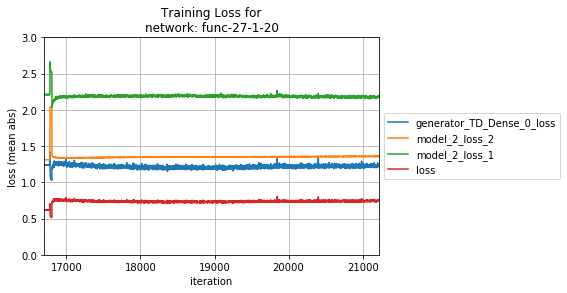

In [799]:
nd.plot_training_loss(network_model, 'mean abs', columns=['generator_TD_Dense_0_loss', 'model_2_loss_2', 'model_2_loss_1', 'loss'], weights=[20,1,1,10], start_index=16700, y_max=3) 

In [800]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/gen_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,generator_TD_Dense_0_loss,loss,model_1_loss,model_2_loss_1,model_2_loss_2

0,0.0609081967689,0.0738805504586,0.436812526007,2.16703758926,1.35814354604
0,0.0608077182081,0.0737675120099,0.437724619264,2.18705964178,1.35678707014
0,0.0606969215198,0.0736698733255,0.435742582255,2.17502427823,1.35799206819
0,0.0627173029171,0.0756695924392,0.437418306991,2.18145020623,1.35794624516
0,0.0622152668388,0.0751776875228,0.439879335574,2.18755841298,1.35845728859
0,0.0609781833159,0.0739481795004,0.437228470596,2.18193980377,1.35797776054
0,0.061479775683,0.0744404642969,0.437376968748,2.17492550126,1.35754860362
0,0.0609935646997,0.0739460309716,0.436670837414,2.17749699876,1.35624015043
0,0.0617298728062,0.0746860099251,0.437185762336,2.17169857569,1.35734355763
0,0.0621639715807,0.0751230499077,0.437359547338,2.19528679463,1.3580717872

21210


Latest Iteration: 21210
3200 rate codec



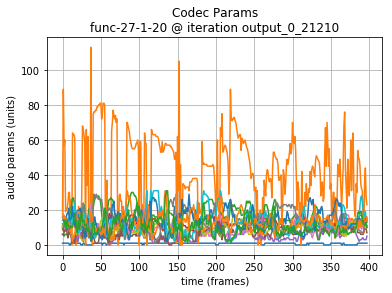

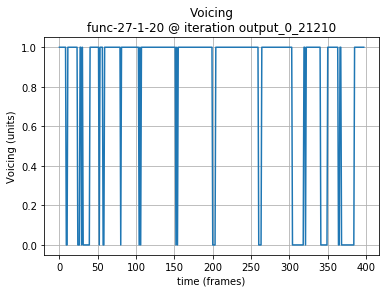

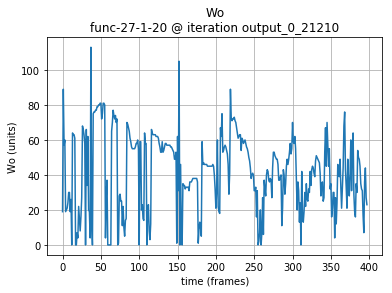

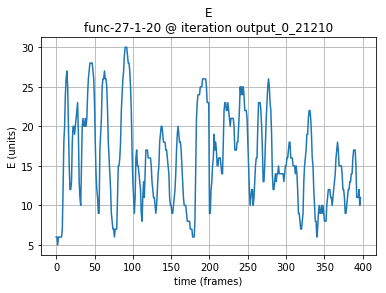

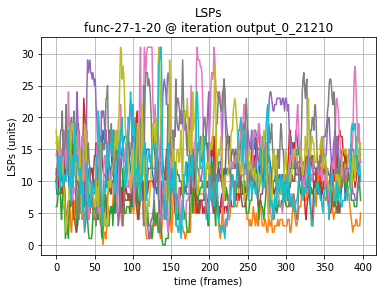

In [801]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
  
  chart_postfix = output_fn_postfix

  nd.plot_codec_params(network_model,chart_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,chart_postfix, params='Voicing')
  nd.plot_spec_params(network_model,chart_postfix, params='Wo')
  nd.plot_spec_params(network_model,chart_postfix, params='E')
  nd.plot_spec_params(network_model,chart_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

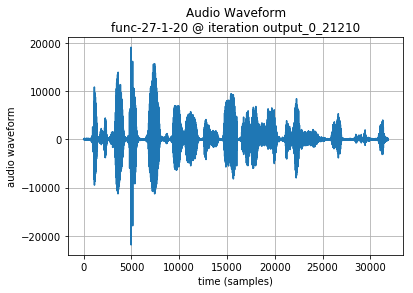

In [802]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

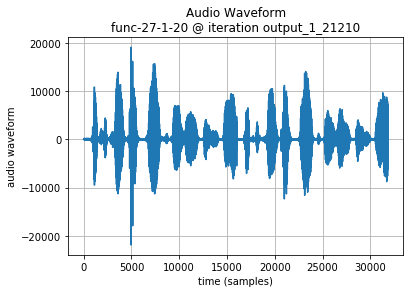

In [803]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

In [804]:
print(output_fn_postfix1)
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

output_0_213750


FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-27-1-20/out-c2cb-output_0_213750'

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

In [ ]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 